In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix
import pandas as pd
# import seaborn as sns

In [2]:
train_df = pd.read_csv('archive/fashion-mnist_train.csv',sep=',')
test_df = pd.read_csv('archive/fashion-mnist_test.csv', sep = ',')

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_data = np.array(train_df, dtype = 'float32')

In [5]:
test_data = np.array(test_df, dtype='float32')

In [6]:
x_train = train_data[:,1:]/255

y_train = train_data[:,0]

x_test= test_data[:,1:]/255

y_test=test_data[:,0]

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)

In [8]:
# (x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [9]:
# x_train = x_train / 255.0
# x_test = x_test / 255.0

In [10]:
# x_train = x_train.reshape(-1, 28, 28, 1)
# x_test = x_test.reshape(-1, 28, 28, 1)
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1) 

In [11]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

In [12]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Text(0.5, 1.0, 'Class distribution in testing set')

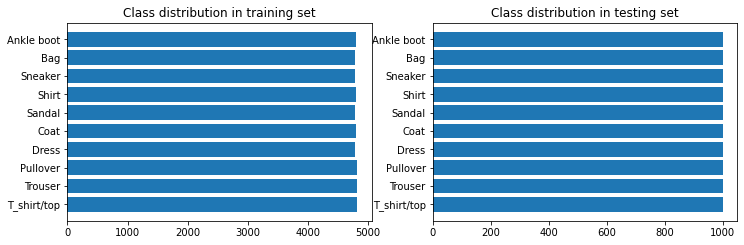

In [13]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
classes, counts = np.unique(y_train, return_counts=True)
plt.barh(class_names, counts)
plt.title('Class distribution in training set')

plt.subplot(2, 2, 2)
classes, counts = np.unique(y_test, return_counts=True)
plt.barh(class_names, counts)
plt.title('Class distribution in testing set')

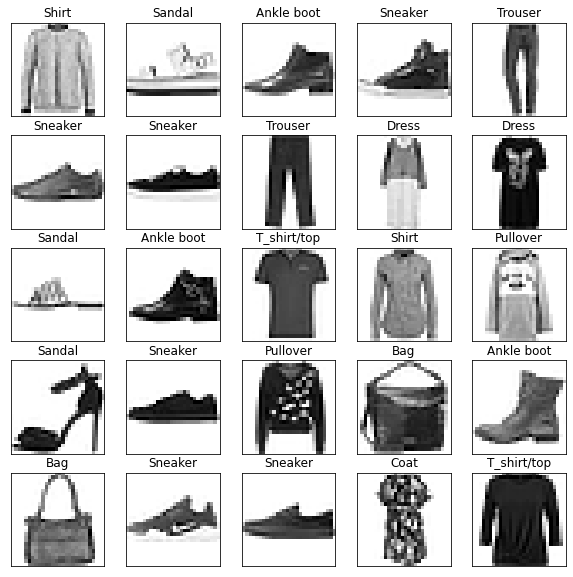

<Figure size 432x288 with 0 Axes>

In [14]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)), cmap=plt.cm.binary)
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()
plt.tight_layout()

In [15]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [17]:
history=model.fit(x_train, y_train, epochs=10, validation_data=(x_validate,y_validate))


Epoch 1/10
1500/1500 [==============================] - 34s 22ms/step - loss: 0.4168 - accuracy: 0.8514 - val_loss: 0.3167 - val_accuracy: 0.8838
Epoch 2/10
1500/1500 [==============================] - 40s 26ms/step - loss: 0.2760 - accuracy: 0.8999 - val_loss: 0.2537 - val_accuracy: 0.9077
Epoch 3/10
1500/1500 [==============================] - 46s 31ms/step - loss: 0.2290 - accuracy: 0.9160 - val_loss: 0.2290 - val_accuracy: 0.9183
Epoch 4/10
1500/1500 [==============================] - 42s 28ms/step - loss: 0.1936 - accuracy: 0.9287 - val_loss: 0.2082 - val_accuracy: 0.9243
Epoch 5/10
1500/1500 [==============================] - 35s 23ms/step - loss: 0.1655 - accuracy: 0.9398 - val_loss: 0.2276 - val_accuracy: 0.9204
Epoch 6/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.1377 - accuracy: 0.9488 - val_loss: 0.2275 - val_accuracy: 0.9158
Epoch 7/10
1500/1500 [==============================] - 35s 23ms/step - loss: 0.1139 - accuracy: 0.9576 - val_loss: 0.2336 -

Text(0.5, 1.0, 'Accuracy evolution')

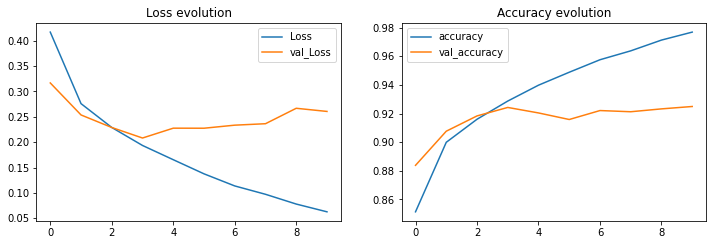

In [18]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

In [19]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


313/313 [==============================] - 2s 7ms/step - loss: 0.2589 - accuracy: 0.9264
Test accuracy: 0.9264000058174133


In [20]:
predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(predicted_classes, axis=1)

In [21]:
test_img = x_test[0]
prediction = model.predict(x_test)
prediction[0]

array([9.9997854e-01, 9.2223694e-14, 1.3142169e-07, 9.7499675e-10,
       2.8038386e-07, 1.6954739e-13, 2.1056396e-05, 2.6854044e-10,
       3.4522715e-11, 2.3050331e-13], dtype=float32)

In [22]:
np.argmax(prediction[0])

0

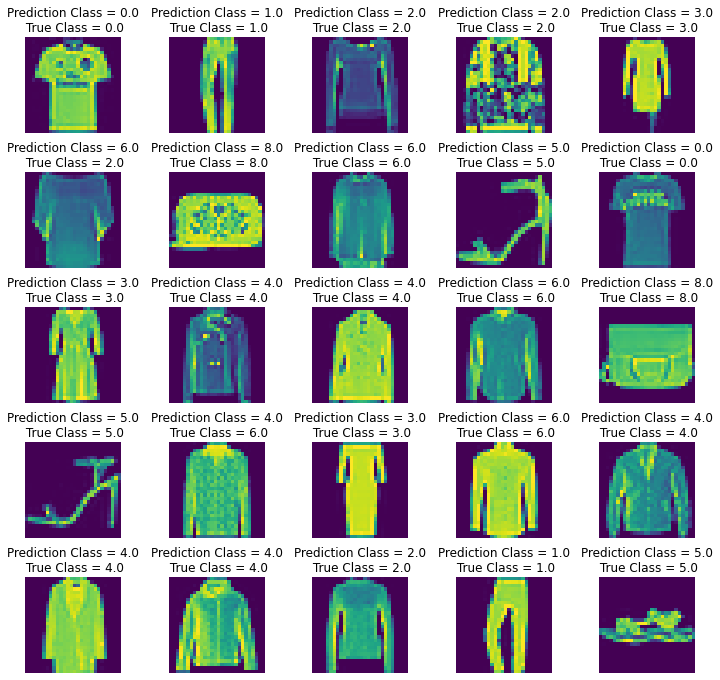

In [23]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {(predicted_classes[i]):0.1f}\n True Class = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

In [24]:
# cm = confusion_matrix(y_test, predicted_classes)
# plt.figure(figsize = (14,10))
# sns.heatmap(cm, annot=True)